In [37]:
# Mostly from https://github.com/Mrk-Nguyen/dmamap/blob/master/geopandas.ipynb

In [124]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
import cartopy.crs as ccrs
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [126]:
# Note - Alpena is not included in this mapping visualization, but exists as a DMA to market in
mapping_dict = {
    'Abilene-Sweetwater, TX': 'Abilene-Sweetwater',
    'Albany, GA': 'Albany, GA',
    'Albany-Schenectady-Troy, NY': 'Albany-Schenectady-Troy',
    'Albuquerque-Santa Fe, NM': 'Albuquerque-Santa Fe',
    'Alexandria, LA': 'Alexandria, LA',
    'Alpena, MI': None,  # No match found
    'Amarillo, TX': 'Amarillo',
    'Atlanta, GA': 'Atlanta',
    'Augusta, GA': 'Augusta-Aiken',
    'Austin, TX': 'Austin',
    'Bakersfield, CA': 'Bakersfield',
    'Baltimore, MD': 'Baltimore',
    'Bangor, ME': 'Bangor',
    'Baton Rouge, LA': 'Baton Rouge',
    'Beaumont-Port Arthur, TX': 'Beaumont-Port Arthur',
    'Bend, OR': 'Bend, OR',
    'Billings, MT': 'Billings',
    'Biloxi-Gulfport, MS': 'Biloxi-Gulfport',
    'Binghamton, NY': 'Binghamton',
    'Birmingham (Anniston and Tuscaloosa), AL': 'Birmingham (Ann and Tusc)',
    'Bluefield-Beckley-Oak Hill, WV': 'Bluefield-Beckley-Oak Hill',
    'Boise, ID': 'Boise',
    'Boston, MA (Manchester, NH)': 'Boston (Manchester)',
    'Bowling Green, KY': 'Bowling Green',
    'Buffalo, NY': 'Buffalo',
    'Burlington, VT-Plattsburgh, NY': 'Burlington-Plattsburgh',
    'Butte-Bozeman, MT': 'Butte-Bozeman',
    'Casper-Riverton, WY': 'Casper-Riverton',
    'Cedar Rapids-Waterloo-Iowa City & Dubuque, IA': 'Cedar Rapids-Wtrlo-IWC&Dub',
    'Champaign & Springfield-Decatur, IL': 'Champaign&Sprngfld-Decatur',
    'Charleston, SC': 'Charleston, SC',
    'Charleston-Huntington, WV': 'Charleston-Huntington',
    'Charlotte, NC': 'Charlotte',
    'Charlottesville, VA': 'Charlottesville',
    'Chattanooga, TN': 'Chattanooga',
    'Cheyenne, WY-Scottsbluff, NE': 'Cheyenne-Scottsbluff',
    'Chicago, IL': 'Chicago',
    'Chico-Redding, CA': 'Chico-Redding',
    'Cincinnati, OH': 'Cincinnati',
    'Clarksburg-Weston, WV': 'Clarksburg-Weston',
    'Cleveland-Akron (Canton), OH': 'Cleveland-Akron (Canton)',
    'Colorado Springs-Pueblo, CO': 'Colorado Springs-Pueblo',
    'Columbia, SC': 'Columbia, SC',
    'Columbia-Jefferson City, MO': 'Columbia-Jefferson City',
    'Columbus, GA': 'Columbus, GA (Opelika, AL)',
    'Columbus, OH': 'Columbus, OH',
    'Columbus-Tupelo-West Point, MS': 'Columbus-Tupelo-W Pnt-Hstn',
    'Corpus Christi, TX': 'Corpus Christi',
    'Dallas-Ft. Worth, TX': 'Dallas-Ft. Worth',
    'Davenport, IA-Rock Island-Moline, IL': 'Davenport-R.Island-Moline',
    'Dayton, OH': 'Dayton',
    'Denver, CO': 'Denver',
    'Des Moines-Ames, IA': 'Des Moines-Ames',
    'Detroit, MI': 'Detroit',
    'Dothan, AL': 'Dothan',
    'Duluth, MN-Superior, WI': 'Duluth-Superior',
    'El Paso, TX': 'El Paso (Las Cruces)',
    'Elmira, NY': 'Elmira (Corning)',
    'Erie, PA': 'Erie',
    'Eugene, OR': 'Eugene',
    'Eureka, CA': 'Eureka',
    'Evansville, IN': 'Evansville',
    'Fargo-Valley City, ND': 'Fargo-Valley City',
    'Flint-Saginaw-Bay City, MI': 'Flint-Saginaw-Bay City',
    'Fresno-Visalia, CA': 'Fresno-Visalia',
    'Ft. Myers-Naples, FL': 'Ft. Myers-Naples',
    'Ft. Smith-Fayetteville-Springdale-Rogers, AR': 'Ft. Smith-Fay-Sprngdl-Rgrs',
    'Ft. Wayne, IN': 'Ft. Wayne',
    'Gainesville, FL': 'Gainesville',
    'Glendive, MT': 'Glendive',
    'Grand Junction-Montrose, CO': 'Grand Junction-Montrose',
    'Grand Rapids-Kalamazoo-Battle Creek, MI': 'Grand Rapids-Kalmzoo-B.Crk',
    'Great Falls, MT': 'Great Falls',
    'Green Bay-Appleton, WI': 'Green Bay-Appleton',
    'Greensboro-High Point-Winston Salem, NC': 'Greensboro-H.Point-W.Salem',
    'Greenville-New Bern-Washington, NC': 'Greenville-N.Bern-Washngtn',
    'Greenville-Spartanburg, SC-Asheville, NC-Anderson,SC': 'Greenvll-Spart-Ashevll-And',
    'Greenwood-Greenville, MS': 'Greenwood-Greenville',
    'Harlingen-Weslaco-Brownsville-McAllen, TX': 'Harlingen-Wslco-Brnsvl-McA',
    'Harrisburg-Lancaster-Lebanon-York, PA': 'Harrisburg-Lncstr-Leb-York',
    'Harrisonburg, VA': 'Harrisonburg',
    'Hartford & New Haven, CT': 'Hartford & New Haven',
    'Hattiesburg-Laurel, MS': 'Hattiesburg-Laurel',
    'Helena, MT': 'Helena',
    'Houston, TX': 'Houston',
    'Huntsville-Decatur (Florence), AL': 'Huntsville-Decatur (Flor)',
    'Idaho Falls-Pocatello, ID': 'Idaho Fals-Pocatllo(Jcksn)',
    'Indianapolis, IN': 'Indianapolis',
    'Jackson, MS': 'Jackson, MS',
    'Jackson, TN': 'Jackson, TN',
    'Jacksonville, FL': 'Jacksonville',
    'Johnstown-Altoona, PA': 'Johnstown-Altoona-St Colge',
    'Jonesboro, AR': 'Jonesboro',
    'Joplin, MO-Pittsburg, KS': 'Joplin-Pittsburg',
    'Kansas City, MO': 'Kansas City',
    'Knoxville, TN': 'Knoxville',
    'La Crosse-Eau Claire, WI': 'La Crosse-Eau Claire',
    'Lafayette, IN': 'Lafayette, IN',
    'Lafayette, LA': 'Lafayette, LA',
    'Lake Charles, LA': 'Lake Charles',
    'Lansing, MI': 'Lansing',
    'Laredo, TX': 'Laredo',
    'Las Vegas, NV': 'Las Vegas',
    'Lexington, KY': 'Lexington',
    'Lima, OH': 'Lima',
    'Lincoln & Hastings-Kearney, NE': 'Lincoln & Hastings-Krny',
    'Little Rock-Pine Bluff, AR': 'Little Rock-Pine Bluff',
    'Los Angeles, CA': 'Los Angeles',
    'Louisville, KY': 'Louisville',
    'Lubbock, TX': 'Lubbock',
    'Macon, GA': 'Macon',
    'Madison, WI': 'Madison',
    'Mankato, MN': 'Mankato',
    'Marquette, MI': 'Marquette',
    'Medford-Klamath Falls, OR': 'Medford-Klamath Falls',
    'Memphis, TN': 'Memphis',
    'Meridian, MS': 'Meridian',
    'Miami-Fort Lauderdale, FL': 'Miami-Ft. Lauderdale',
    'Milwaukee, WI': 'Milwaukee',
    'Minneapolis-St. Paul, MN': 'Minneapolis-St. Paul',
    'Minot-Bismarck-Dickinson(Williston), ND': 'Minot-Bsmrck-Dcknsn(Wlstn)',
    'Missoula, MT': 'Missoula',
    'Mobile, AL-Pensacola (Ft. Walton Beach), FL': 'Mobile-Pensacola (Ft Walt)',
    'Monroe, LA-El Dorado, AR': 'Monroe-El Dorado',
    'Monterey-Salinas, CA': 'Monterey-Salinas',
    'Montgomery-Selma, AL': 'Montgomery-Selma',
    'Myrtle Beach-Florence, SC': 'Myrtle Beach-Florence',
    'Nashville, TN': 'Nashville',
    'New Orleans, LA': 'New Orleans',
    'New York, NY': 'New York',
    'Norfolk-Portsmouth-Newport News, VA': 'Norfolk-Portsmth-Newpt Nws',
    'North Platte, NE': 'North Platte',
    'Odessa-Midland, TX': 'Odessa-Midland',
    'Oklahoma City, OK': 'Oklahoma City',
    'Omaha, NE': 'Omaha',
    'Orlando-Daytona Beach-Melbourne, FL': 'Orlando-Daytona Bch-Melbrn',
    'Ottumwa, IA-Kirksville, MO': 'Ottumwa-Kirksville',
    'Paducah, KY-Cape Girardeau, MO-Harrisburg, IL': 'Paducah-Cape Girard-Harsbg',
    'Palm Springs, CA': 'Palm Springs',
    'Panama City, FL': 'Panama City',
    'Parkersburg, WV': 'Parkersburg',
    'Peoria-Bloomington, IL': 'Peoria-Bloomington',
    'Philadelphia, PA': 'Philadelphia',
    'Phoenix, AZ': 'Phoenix (Prescott)',
    'Pittsburgh, PA': 'Pittsburgh',
    'Portland, OR': 'Portland, OR',
    'Portland-Auburn, ME': 'Portland-Auburn',
    'Presque Isle, ME': 'Presque Isle',
    'Providence, RI-New Bedford, MA': 'Providence-New Bedford',
    'Quincy, IL-Hannibal, MO-Keokuk, IA': 'Quincy-Hannibal-Keokuk',
    'Raleigh-Durham (Fayetteville), NC': 'Raleigh-Durham (Fayetvlle)',
    'Rapid City, SD': 'Rapid City',
    'Reno, NV': 'Reno',
    'Richmond-Petersburg, VA': 'Richmond-Petersburg',
    'Roanoke-Lynchburg, VA': 'Roanoke-Lynchburg',
    'Rochester, NY': 'Rochester, NY',
    'Rochester, MN-Mason City, IA-Austin, MN': 'Rochestr-Mason City-Austin',
    'Rockford, IL': 'Rockford',
    'Sacramento-Stockton-Modesto, CA': 'Sacramnto-Stkton-Modesto',
    'Salisbury, MD': 'Salisbury',
    'Salt Lake City, UT': 'Salt Lake City',
    'San Angelo, TX': 'San Angelo',
    'San Antonio, TX': 'San Antonio',
    'San Diego, CA': 'San Diego',
    'San Francisco-Oakland-San Jose, CA': 'San Francisco-Oak-San Jose',
    'Santa Barbara-Santa Maria-San Luis Obispo, CA': 'SantaBarbra-SanMar-SanLuOb',
    'Savannah, GA': 'Savannah',
    'Seattle-Tacoma, WA': 'Seattle-Tacoma',
    'Sherman, TX-Ada, OK': 'Sherman-Ada',
    'Shreveport, LA': 'Shreveport',
    'Sioux City, IA': 'Sioux City',
    'Sioux Falls (Mitchell), SD': 'Sioux Falls(Mitchell)',
    'South Bend-Elkhart, IN': 'South Bend-Elkhart',
    'Spokane, WA': 'Spokane',
    'Springfield, MO': 'Springfield, MO',
    'Springfield-Holyoke, MA': 'Springfield-Holyoke',
    'St. Joseph, MO': 'St. Joseph',
    'St. Louis, MO': 'St. Louis',
    'Syracuse, NY': 'Syracuse',
    'Tallahassee, FL-Thomasville, GA': 'Tallahassee-Thomasville',
    'Tampa-St. Petersburg (Sarasota), FL': 'Tampa-St. Pete (Sarasota)',
    'Terre Haute, IN': 'Terre Haute',
    'Toledo, OH': 'Toledo',
    'Topeka, KS': 'Topeka',
    'Traverse City-Cadillac, MI': 'Traverse City-Cadillac',
    'Tri-Cities, TN-VA': 'Tri-Cities, TN-VA',
    'Tucson (Sierra Vista), AZ': 'Tucson (Sierra Vista)',
    'Tulsa, OK': 'Tulsa',
    'Twin Falls, ID': 'Twin Falls',
    'Tyler-Longview(Lufkin & Nacogdoches), TX': 'Tyler-Longview(Lfkn&Ncgd)',
    'Utica, NY': 'Utica',
    'Victoria, TX': 'Victoria',
    'Waco-Temple-Bryan, TX': 'Waco-Temple-Bryan',
    'Washington, DC (Hagerstown, MD)': 'Washington, DC (Hagrstwn)',
    'Watertown, NY': 'Watertown',
    'Wausau-Rhinelander, WI': 'Wausau-Rhinelander',
    'West Palm Beach-Ft. Pierce, FL': 'West Palm Beach-Ft. Pierce',
    'Wheeling, WV-Steubenville, OH': 'Wheeling-Steubenville',
    'Wichita Falls, TX-Lawton, OK': 'Wichita Falls & Lawton',
    'Wichita-Hutchinson, KS Plus': 'Wichita-Hutchinson Plus',
    'Wilkes Barre-Scranton, PA': 'Wilkes Barre-Scranton-Hztn',
    'Wilmington, NC': 'Wilmington',
    'Yakima-Pasco-Richland-Kennewick, WA': 'Yakima-Pasco-Rchlnd-Knnwck',
    'Youngstown, OH': 'Youngstown',
    'Yuma, AZ-El Centro, CA': 'Yuma-El Centro',
    'Zanesville, OH': 'Zanesville'
}

In [128]:
# Read in dmas
dmas_gdf = gpd.read_file('nielsengeo.json')
dmas_gdf = (dmas_gdf.drop(columns='name').
                   rename(columns=dict(dma='dma_code',dma1='dma_name')))
dmas_gdf['dma_name'] = dmas_gdf['dma_name'].map(mapping_dict)

dmas_gdf = dmas_gdf.dropna()

# Load Performance metrics for each dma
perf_df = pd.read_csv('dma_mapping.csv').drop('Unnamed: 0', axis = 1)

# Merge performance data with dmas_df
dmas_gdf = (dmas_gdf.merge(perf_df,on='dma_name',how='left').
           fillna(value=0))

# Set default projection
dmas_gdf.crs = dict(init='epsg:4326')

/opt/anaconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [132]:
# Set Map projection to Albers Equal Area
# projection = ccrs.AlbersEqualArea(central_latitude=39.5,central_longitude=-98.35).proj4_params

# Set Map projection to US Atlas National Equal Area
projection = dict(init='epsg:2163')

## App

/opt/anaconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


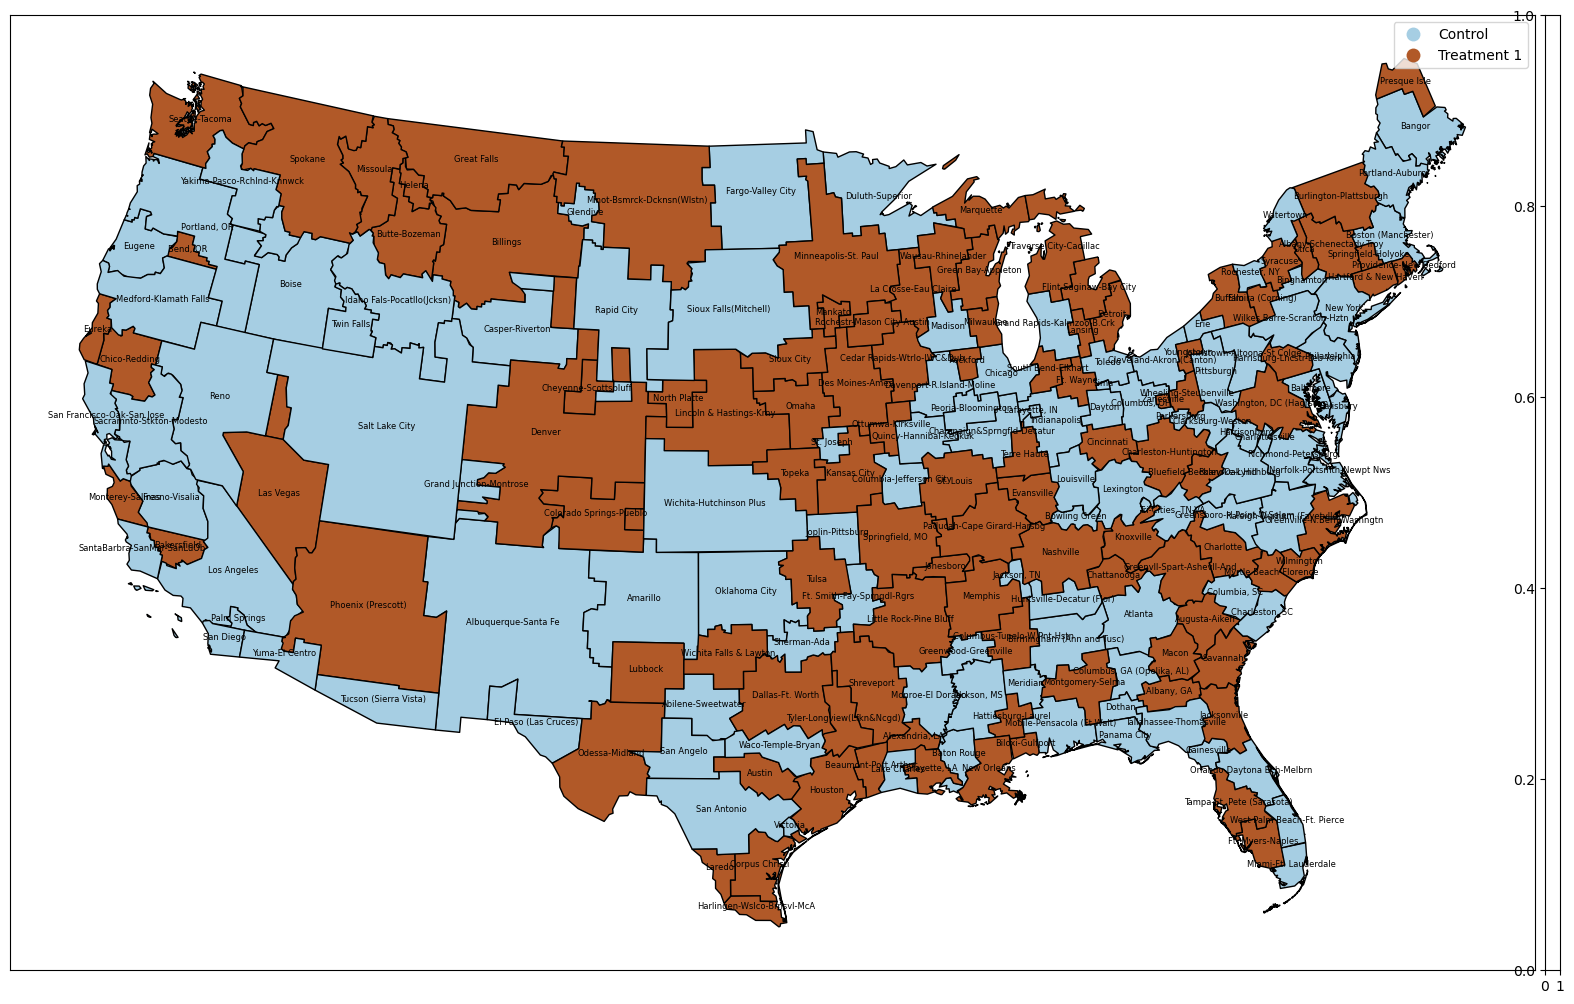

In [135]:
fig, ax = plt.subplots(figsize=(20,15))

plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right',size='1%', pad=0.1)
dmas_gdf.to_crs(projection,inplace=True)
dmas_gdf.plot(column='app_segments',
              ax=ax,
              edgecolor='black',
              legend=True,
              cax=cax,cmap='Paired')

# Add DMA names to the map
for idx, row in dmas_gdf.iterrows():
    # Get the centroid of each DMA for placing the text
    centroid = row['geometry'].centroid
    dma_name = row['dma_name']  # Replace with the correct column name for DMA names

    # Annotate the map with the DMA name, offsetting to avoid overlapping text
    ax.annotate(text=dma_name, xy=(centroid.x, centroid.y), fontsize=6, ha='center')

## YouTube

/opt/anaconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


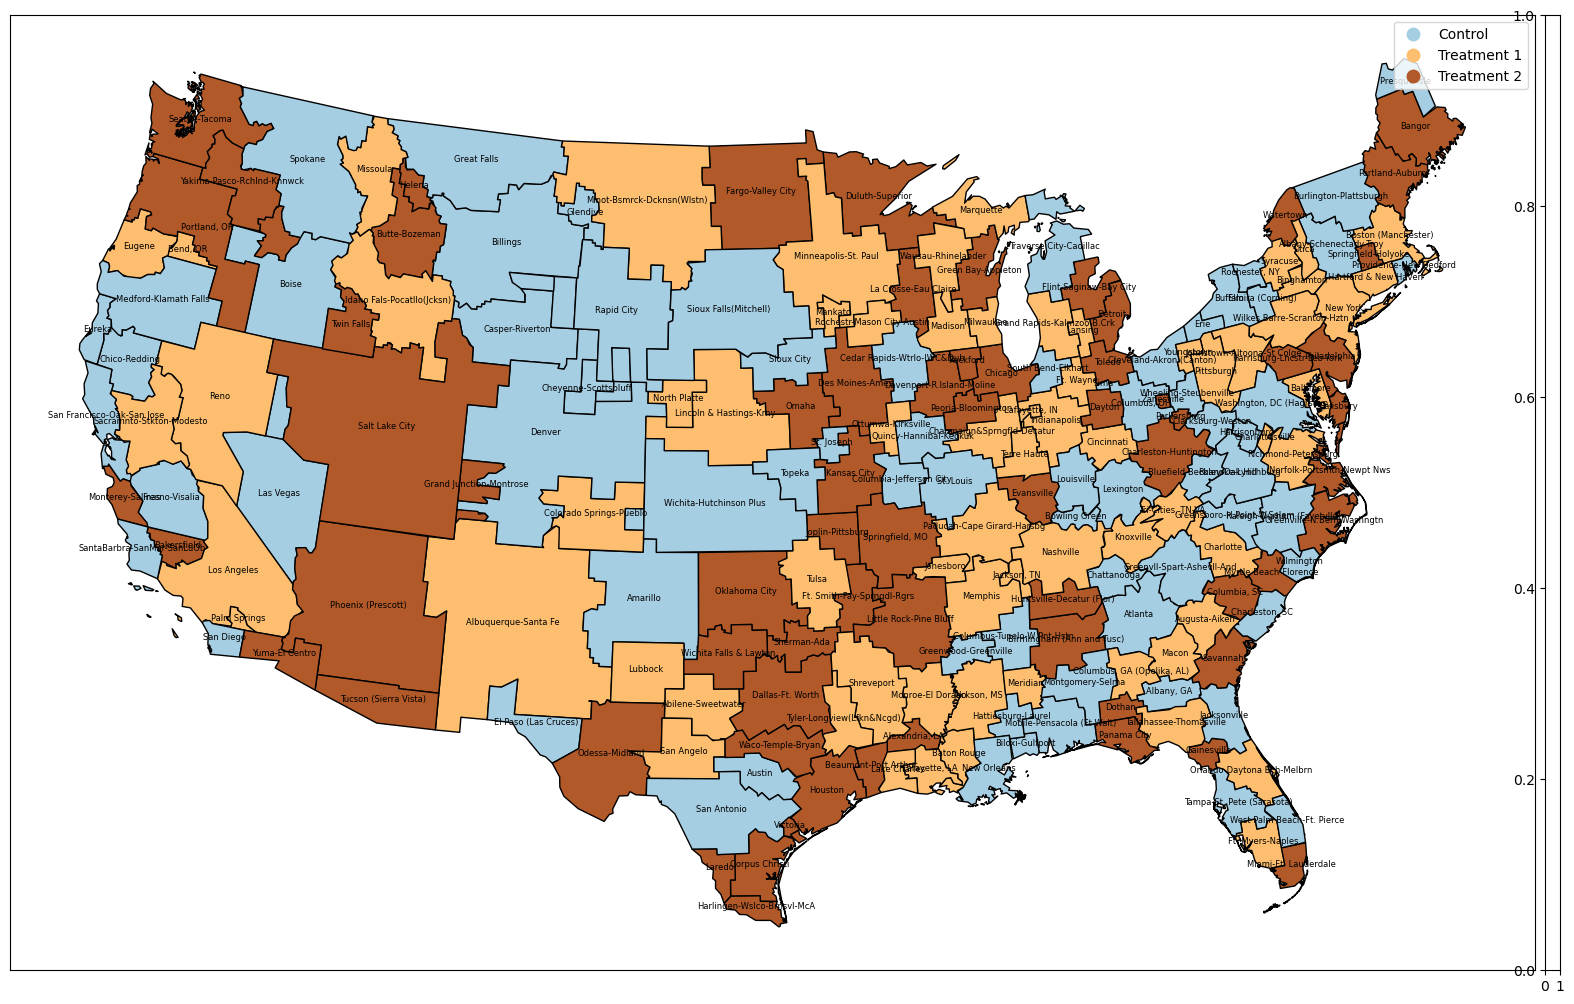

In [138]:
# YouTube
fig, ax = plt.subplots(figsize=(20,15))

plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right',size='1%', pad=0.1)
dmas_gdf.to_crs(projection,inplace=True)
dmas_gdf.plot(column='youtube_segments',
              ax=ax,
              edgecolor='black',
              legend=True,
              cax=cax,cmap='Paired')

# Add DMA names to the map
for idx, row in dmas_gdf.iterrows():
    # Get the centroid of each DMA for placing the text
    centroid = row['geometry'].centroid
    dma_name = row['dma_name']  # Replace with the correct column name for DMA names

    # Annotate the map with the DMA name, offsetting to avoid overlapping text
    ax.annotate(text=dma_name, xy=(centroid.x, centroid.y), fontsize=6, ha='center')

## Groupings

/opt/anaconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


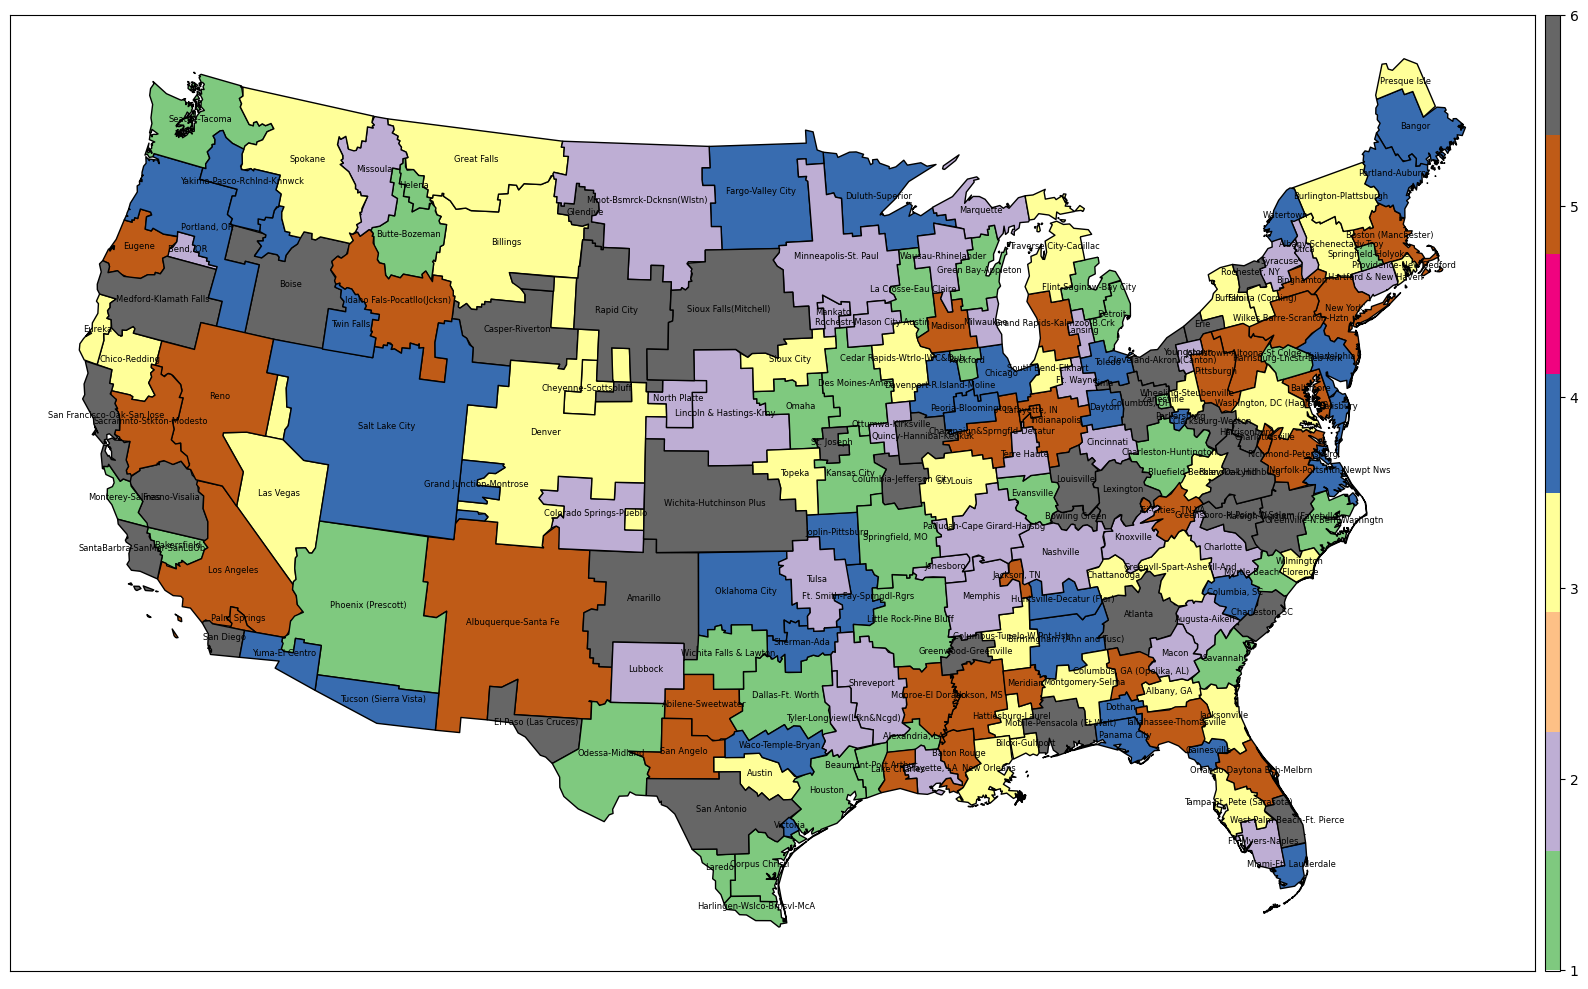

In [141]:
fig, ax = plt.subplots(figsize=(20,15))

plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right',size='1%', pad=0.1)
dmas_gdf.to_crs(projection,inplace=True)
dmas_gdf.plot(column='group',
              ax=ax,
              edgecolor='black',
              legend=True,
              cax=cax,cmap='Accent')

# Add DMA names to the map
for idx, row in dmas_gdf.iterrows():
    # Get the centroid of each DMA for placing the text
    centroid = row['geometry'].centroid
    dma_name = row['dma_name']  # Replace with the correct column name for DMA names

    # Annotate the map with the DMA name, offsetting to avoid overlapping text
    ax.annotate(text=dma_name, xy=(centroid.x, centroid.y), fontsize=6, ha='center')